In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
class PidController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.integral_result = 0
    
    def proportional(self, err):
        return self.kp * err
    
    def derivative(self, err, err_prev, dt):
        return self.ki * (err / dt)
    
    def integral(self, err, dt):
        self.integral_result += self.kd * (err * dt)
        return self.integral_result
    
    def result(self, err, err_prev, dt):
        return self.proportional(err)+self.integral(err, dt)+self.derivative(err, err_prev, dt)
    
    
def simulate(start, target, kp, ki, kd):
    duration = 2000
    delta_t = 10
    err = 0.0
    err_prev = 0.0
    result = start
    pid = PidController(kp, ki, kd)
    results_dict = {}
    
    for t in range(0, duration, delta_t):
        err = target - result
        result = pid.result(err, err_prev, delta_t)
        err_prev = err
        results_dict[t] = err
        
    d = {'t': results_dict.keys(), 'error': results_dict.values()}
    plt.plot(d['t'], d['error'])   
        

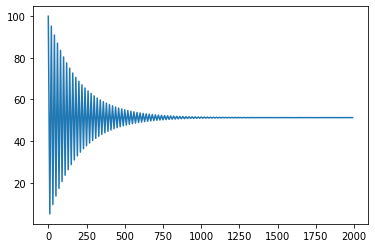

In [155]:
simulate(0, 100, 1,-0.5,0.0)

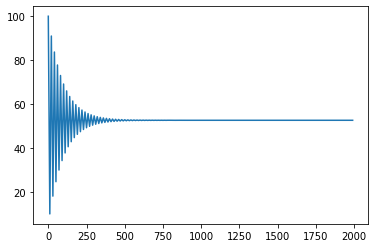

In [156]:
simulate(0, 100, 1,-1,0.0)

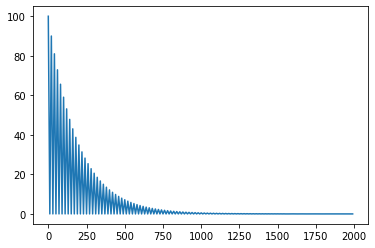

In [157]:
simulate(0, 100, 1,-1,0.01)

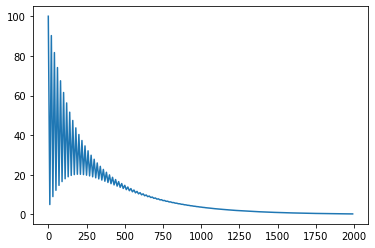

In [158]:
simulate(0, 100, 1,-1,0.005)